In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
from matplotlib import gridspec
import h5py
from matplotlib import cm
import matplotlib.font_manager as font_manager
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)

plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.major.width'] = 1.5
font = font_manager.FontProperties(family='monospace', #Typewriter font
                                   weight='light',
                                   style='normal', size=16)

mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['legend.handlelength']=2
mpl.rcParams['legend.fontsize']=16
mpl.rcParams['legend.frameon']=False
mpl.rcParams['axes.labelsize']=18
mpl.rcParams['xtick.labelsize']=16
mpl.rcParams['ytick.labelsize']=16
mpl.rcParams['legend.labelspacing'] = 0.1
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.direction'] = 'inout'
mpl.rcParams['xtick.direction'] = 'inout'

In [2]:
tbounce=.377756172723849759
tolerance = 0.07e2
k_b = 1.3806488e-16 # erg/K                                                                                                                                                                              
c = 2.99e10         # cm/s                                                                                                                                                                               
h = 6.62606957e-27  # erg/Hz                                                                                                                                                                             
pi = 3.14159265359
k_MeV = 1.16046e10
erg_to_MeV = 624151
MeV_to_erg = 1 / erg_to_MeV # erg  
t_GR_shift = 7738846.373720614
#t_GR_shift=9445478.353931798
timeOffset = (7278367976.5-50e5+t_GR_shift) / 29979245800 
splitTime = 600
timeBinWidths = [0.01, 0.01] # ms  

tend = 0.9146844-tbounce
print(tend)

styles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1, 1, 1))]
marks = ['x', '+', '1', '*', '2']
colours1 = ['xkcd:sky blue', 'xkcd:orange', 'xkcd:green', 'xkcd:wine red', 'xkcd:lavender']
colours2 = ['C0','C1','C2','C3','C4']
labels = ["nue", "anue", "nux"]

0.5369282272761502


In [3]:
f1 = h5py.File("../data/spectra_cutoff_0.01ms_10km_0.913-0.9146844.h5",'r')

x_grid = np.array(f1["axes/x0(cm)[mid]"])
t_grid = np.array(f1["axes/t(s)[mid]"])-timeOffset-tbounce
nu_grid = np.array(f1["axes/frequency(Hz)[mid]"])


nue_spectrum = np.zeros(len(np.array(f1["spectrum0(erg|s)"][:,0,0,0]))*18).reshape(18,len(np.array(f1["spectrum0(erg|s)"][:,0,0,0])))
nua_spectrum = np.zeros(len(np.array(f1["spectrum0(erg|s)"][:,0,0,0]))*18).reshape(18,len(np.array(f1["spectrum0(erg|s)"][:,0,0,0])))
nux_spectrum = np.zeros(len(np.array(f1["spectrum0(erg|s)"][:,0,0,0]))*18).reshape(18,len(np.array(f1["spectrum0(erg|s)"][:,0,0,0])))

nue_dspecdt = nue_spectrum*0.0
nua_dspecdt = nua_spectrum*0.0
nux_dspecdt = nux_spectrum*0.0

nue_sspectrum = np.zeros(len(np.array(f1["spectrum0(erg|s)"][:,0,0,0])))
nue_dsspecdt = nue_sspectrum*0.0

nua_sspectrum = np.zeros(len(np.array(f1["spectrum0(erg|s)"][:,0,0,0])))
nua_dsspecdt = nua_sspectrum*0.0

nux_sspectrum = np.zeros(len(np.array(f1["spectrum0(erg|s)"][:,0,0,0])))
nux_dsspecdt = nux_sspectrum*0.0

n=8
for i in range(18):
    nue_spectrum[i] = 1.6844/0.01*np.array(f1["spectrum0(erg|s)"][:,i,0,0])
    nue_sspectrum += 1.6844/0.01*np.array(f1["spectrum0(erg|s)"][:,i,0,0])
    nua_spectrum[i] = 1.6844/0.01*np.array(f1["spectrum1(erg|s)"][:,i,0,0])
    nua_sspectrum += 1.6844/0.01*np.array(f1["spectrum1(erg|s)"][:,i,0,0])
    nux_spectrum[i] = 1.6844/0.01*np.array(f1["spectrum2(erg|s)"][:,i,0,0])
    nux_sspectrum += 1.6844/0.01*np.array(f1["spectrum2(erg|s)"][:,i,0,0])
    

    for j in range(n,len(nue_spectrum[i])-n-1):
        sx = sum(t_grid[j-n:j+n+1])
        sx2 = sum(t_grid[j-n:j+n+1]**2)
        sy = sum(np.log(nue_spectrum[i,j-n:j+n+1]))
        sxy = sum(t_grid[j-n:j+n+1]*np.log(nue_spectrum[i,j-n:j+n+1]))
        nue_dspecdt[i,j] = ((2*n+1)*sxy-sx*sy)/((2*n+1)*sx2-sx**2)

    for j in range(n,len(nua_spectrum[i])-n-1):
        sx = sum(t_grid[j-n:j+n+1])
        sx2 = sum(t_grid[j-n:j+n+1]**2)
        sy = sum(np.log(nua_spectrum[i,j-n:j+n+1]))
        sxy = sum(t_grid[j-n:j+n+1]*np.log(nua_spectrum[i,j-n:j+n+1]))
        nua_dspecdt[i,j] = ((2*n+1)*sxy-sx*sy)/((2*n+1)*sx2-sx**2)
        
    for j in range(n,len(nux_spectrum[i])-n-1):
        sx = sum(t_grid[j-n:j+n+1])
        sx2 = sum(t_grid[j-n:j+n+1]**2)
        sy = sum(np.log(nux_spectrum[i,j-n:j+n+1]))
        sxy = sum(t_grid[j-n:j+n+1]*np.log(nux_spectrum[i,j-n:j+n+1]))
        nux_dspecdt[i,j] = ((2*n+1)*sxy-sx*sy)/((2*n+1)*sx2-sx**2)
        
for j in range(n,len(nue_spectrum[i])-n-1):
    sx = sum(t_grid[j-n:j+n+1])
    sx2 = sum(t_grid[j-n:j+n+1]**2)
    sy = sum(np.log(nue_sspectrum[j-n:j+n+1]))
    sxy = sum(t_grid[j-n:j+n+1]*np.log(nue_sspectrum[j-n:j+n+1]))
    nue_dsspecdt[j] = ((2*n+1)*sxy-sx*sy)/((2*n+1)*sx2-sx**2)
    
for j in range(n,len(nua_spectrum[i])-n-1):
    sx = sum(t_grid[j-n:j+n+1])
    sx2 = sum(t_grid[j-n:j+n+1]**2)
    sy = sum(np.log(nua_sspectrum[j-n:j+n+1]))
    sxy = sum(t_grid[j-n:j+n+1]*np.log(nua_sspectrum[j-n:j+n+1]))
    nua_dsspecdt[j] = ((2*n+1)*sxy-sx*sy)/((2*n+1)*sx2-sx**2)
    
for j in range(n,len(nux_spectrum[i])-n-1):
    sx = sum(t_grid[j-n:j+n+1])
    sx2 = sum(t_grid[j-n:j+n+1]**2)
    sy = sum(np.log(nux_sspectrum[j-n:j+n+1]))
    sxy = sum(t_grid[j-n:j+n+1]*np.log(nux_sspectrum[j-n:j+n+1]))
    nux_dsspecdt[j] = ((2*n+1)*sxy-sx*sy)/((2*n+1)*sx2-sx**2)


<ipython-input-3-45e0898d634d>:38: RuntimeWarning: divide by zero encountered in log
  sy = sum(np.log(nue_spectrum[i,j-n:j+n+1]))
<ipython-input-3-45e0898d634d>:39: RuntimeWarning: divide by zero encountered in log
  sxy = sum(t_grid[j-n:j+n+1]*np.log(nue_spectrum[i,j-n:j+n+1]))
<ipython-input-3-45e0898d634d>:40: RuntimeWarning: invalid value encountered in double_scalars
  nue_dspecdt[i,j] = ((2*n+1)*sxy-sx*sy)/((2*n+1)*sx2-sx**2)
<ipython-input-3-45e0898d634d>:45: RuntimeWarning: divide by zero encountered in log
  sy = sum(np.log(nua_spectrum[i,j-n:j+n+1]))
<ipython-input-3-45e0898d634d>:46: RuntimeWarning: divide by zero encountered in log
  sxy = sum(t_grid[j-n:j+n+1]*np.log(nua_spectrum[i,j-n:j+n+1]))
<ipython-input-3-45e0898d634d>:47: RuntimeWarning: invalid value encountered in double_scalars
  nua_dspecdt[i,j] = ((2*n+1)*sxy-sx*sy)/((2*n+1)*sx2-sx**2)
<ipython-input-3-45e0898d634d>:52: RuntimeWarning: divide by zero encountered in log
  sy = sum(np.log(nux_spectrum[i,j-n:j+n+

<ipython-input-4-69ed2cdeec65>:53: RuntimeWarning: divide by zero encountered in true_divide
  ax11.plot(t_grid[t_grid>0.53705],-1.0/nue_dspecdt[i][t_grid>0.53705]/.0000110858356,c=cm.viridis(i/12),linewidth=2)
<ipython-input-4-69ed2cdeec65>:54: RuntimeWarning: divide by zero encountered in true_divide
  ax12.plot(t_grid[t_grid>0.53705],-1.0/nua_dspecdt[i][t_grid>0.53705]/.0000110858356,c=cm.viridis(i/12),linewidth=2)
<ipython-input-4-69ed2cdeec65>:55: RuntimeWarning: divide by zero encountered in true_divide
  ax13.plot(t_grid[t_grid>0.53705],-1.0/nux_dspecdt[i][t_grid>0.53705]/.0000110858356,c=cm.viridis(i/12),linewidth=2)
<ipython-input-4-69ed2cdeec65>:53: RuntimeWarning: divide by zero encountered in true_divide
  ax11.plot(t_grid[t_grid>0.53705],-1.0/nue_dspecdt[i][t_grid>0.53705]/.0000110858356,c=cm.viridis(i/12),linewidth=2)
<ipython-input-4-69ed2cdeec65>:54: RuntimeWarning: divide by zero encountered in true_divide
  ax12.plot(t_grid[t_grid>0.53705],-1.0/nua_dspecdt[i][t_grid>0

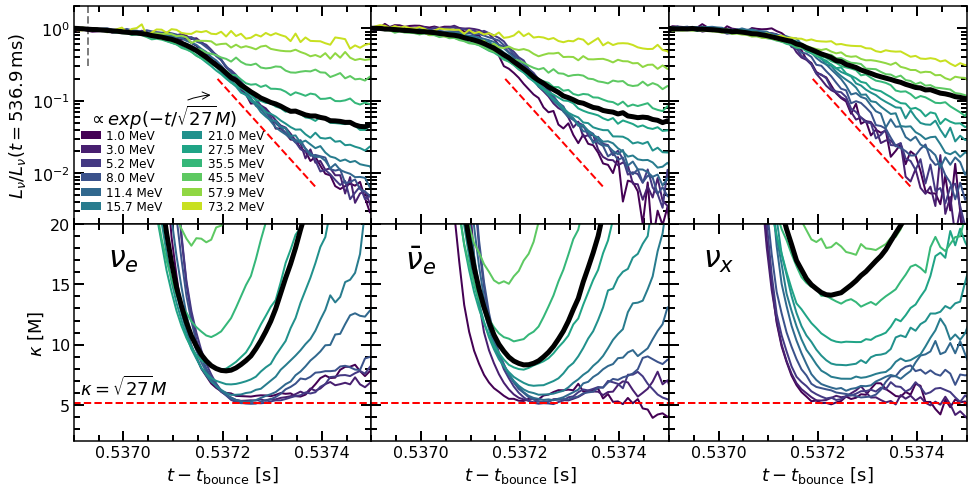

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True,
                                    figsize=(16, 8))
plt.subplots_adjust(hspace=0.0,wspace=0.0)


ax01=axes[0,0]
ax02=axes[0,1]
ax03=axes[0,2]
ax11=axes[1,0]
ax12=axes[1,1]
ax13=axes[1,2]


myt = np.linspace(0.53719,0.53739,100)
mym = myt/0.00001108
myy = np.exp(-(mym-mym[0])/(3*np.sqrt(3)))
#ax0.plot(myt,30e51*myy)
ax01.plot(myt,0.2*myy, 'r--',linewidth=2)
ax02.plot(myt-0.00002,0.2*myy, 'r--',linewidth=2)
ax03.plot(myt,0.2*myy, 'r--',linewidth=2)
ax01.annotate(r"$\propto exp{(-t/\sqrt{27}M)}$",
            xy=(0.53718, 0.12), xycoords='data',
            xytext=(0.53708, 0.06), textcoords='data',
            size=18, va="center", ha="center",
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"),
            )

ax01.set_ylabel(r'$L_{{\nu}}/L_{{\nu}}(t=536.9\,\mathrm{ms})$')
ax11.set_ylabel(r"$\kappa$ [M]")

tindex = np.argmin(np.abs(t_grid-0.5369))

ax01.set_ylim(0.002,2)
ax02.set_ylim(0.002,2)
ax03.set_ylim(0.002,2)
ax01.set_yscale('log')
ax02.set_yscale('log')
ax03.set_yscale('log')

for i in range(12):
    ax01.plot(t_grid,nue_spectrum[i]/nue_spectrum[i][tindex],c=cm.viridis(i/12),linewidth=2)
    ax02.plot(t_grid,nua_spectrum[i]/nua_spectrum[i][tindex],c=cm.viridis(i/12),linewidth=2)
    ax03.plot(t_grid,nux_spectrum[i]/nux_spectrum[i][tindex],c=cm.viridis(i/12),linewidth=2)


ax01.plot(t_grid,nue_sspectrum/nue_sspectrum[tindex],'k',linewidth=5)
ax02.plot(t_grid,nua_sspectrum/nua_sspectrum[tindex],'k',linewidth=5)
ax03.plot(t_grid,nux_sspectrum/nux_sspectrum[tindex],'k',linewidth=5)


for i in range(12):
    ax11.plot(t_grid[t_grid>0.53705],-1.0/nue_dspecdt[i][t_grid>0.53705]/.0000110858356,c=cm.viridis(i/12),linewidth=2)
    ax12.plot(t_grid[t_grid>0.53705],-1.0/nua_dspecdt[i][t_grid>0.53705]/.0000110858356,c=cm.viridis(i/12),linewidth=2)
    ax13.plot(t_grid[t_grid>0.53705],-1.0/nux_dspecdt[i][t_grid>0.53705]/.0000110858356,c=cm.viridis(i/12),linewidth=2)

    
ax11.plot(t_grid[t_grid>0.5370],-1.0/nue_dsspecdt[t_grid>0.5370]/.0000110858356,'k',linewidth=5)
ax12.plot(t_grid[t_grid>0.5370],-1.0/nua_dsspecdt[t_grid>0.5370]/.0000110858356,'k',linewidth=5)
ax13.plot(t_grid[t_grid>0.5370],-1.0/nux_dsspecdt[t_grid>0.5370]/.0000110858356,'k',linewidth=5)


ax11.set_ylim(2,20)
ax11.plot([0,2],[3*np.sqrt(3),3*np.sqrt(3)],'r--')
ax11.annotate(r"$\kappa = \sqrt{27}M$",
            xy=(0.537, 6.5), xycoords='data',
            xytext=(0.537, 6.5), textcoords='data',
            size=18, va="center", ha="center")

ax12.set_ylim(2,20)
ax12.plot([0,2],[3*np.sqrt(3),3*np.sqrt(3)],'r--')

ax13.set_ylim(2,20)
ax13.plot([0,2],[3*np.sqrt(3),3*np.sqrt(3)],'r--')

ax11.set_xlim(0.5369,0.5375)
ax12.set_xlim(0.5369,0.5375)
ax13.set_xlim(0.5369,0.5375)


ax11.set_xlabel("$t-t_\mathrm{bounce}$ [s]")
ax12.set_xlabel("$t-t_\mathrm{bounce}$ [s]")
ax13.set_xlabel("$t-t_\mathrm{bounce}$ [s]")


ax01.tick_params(width=2, length=10, which='major',direction="in", axis="both", right=True, top=True, labelsize=16)
ax01.tick_params(width=2, length=6, which='minor',direction="in", axis="both", right=True, top=True, labelsize=16)
ax11.tick_params(width=2, length=10, which='major',direction="in", axis="both", right=True, top=True, labelsize=16)
ax11.tick_params(width=2, length=6, which='minor',direction="in", axis="both", right=True, top=True, labelsize=16)

ax02.tick_params(width=2, length=10, which='major',direction="in", axis="both", right=True, top=True, labelsize=16)
ax02.tick_params(width=2, length=6, which='minor',direction="in", axis="both", right=True, top=True, labelsize=16)
ax12.tick_params(width=2, length=10, which='major',direction="in", axis="both", right=True, top=True, labelsize=16)
ax12.tick_params(width=2, length=6, which='minor',direction="in", axis="both", right=True, top=True, labelsize=16)

ax03.tick_params(width=2, length=10, which='major',direction="in", axis="both", right=True, top=True, labelsize=16)
ax03.tick_params(width=2, length=6, which='minor',direction="in", axis="both", right=True, top=True, labelsize=16)
ax13.tick_params(width=2, length=10, which='major',direction="in", axis="both", right=True, top=True, labelsize=16)
ax13.tick_params(width=2, length=6, which='minor',direction="in", axis="both", right=True, top=True, labelsize=16)

ax11.xaxis.set_minor_locator(MultipleLocator(0.00005))
ax11.xaxis.set_major_locator(MultipleLocator(0.0002))

ax02.get_yaxis().set_ticklabels([])
ax03.get_yaxis().set_ticklabels([])
ax12.get_yaxis().set_ticklabels([])
ax13.get_yaxis().set_ticklabels([])

ax11.annotate(r"$\nu_e$",
            xy=(0.537, 17), xycoords='data',
            xytext=(0.537, 17), textcoords='data',
            size=30, va="center", ha="center")

ax12.annotate(r"$\bar{\nu}_e$",
            xy=(0.537, 17), xycoords='data',
            xytext=(0.537, 17), textcoords='data',
            size=30, va="center", ha="center")

ax13.annotate(r"$\nu_x$",
            xy=(0.537, 17), xycoords='data',
            xytext=(0.537, 17), textcoords='data',
            size=30, va="center", ha="center")

#energies
nu_gridb = np.array(f1["axes/frequency(Hz)[mid]"])*4.13566766e-21
for i in range(12):
    ax01.plot([0,0],[1,1],label=str("%.1f" % round(nu_gridb[i],1))+" MeV",c=cm.viridis(i/12),linewidth=8)
             
ax01.legend(fontsize=12,ncol=2,handlelength=1)

ax01.plot([tend,tend],[0.3,1e54],'k--',alpha=0.5)
plt.savefig("cutoff_decay.pdf",bbox_inches='tight')
plt.show()

In [5]:
SG_data = np.zeros(40*3*3).reshape(3,3,40)
SG_times = 1000*t_grid[t_grid>0.5370][:40]
sindex = np.argmin(np.abs(t_grid-0.5370))

for ns in range(3):
    if (ns==0): 
        spectra = nue_spectrum.T
        nspectra = nue_spectrum.T
    elif (ns==1): 
        spectra = nua_spectrum.T
        nspectra = nua_spectrum.T
    else:
        spectra = nux_spectrum.T
        nspectra = nux_spectrum.T

    for t in range(40):
        tindex = sindex+t
        spec = spectra[tindex]
        nspec = nspectra[tindex]
        
        lsum = 0; rsum = 0; nsum = 0;
        for g in range(18):
            enu = nu_grid[g]*h #energy in ergs
            lsum += spec[g]
            nsum += spec[g]/enu
            rsum += enu**2*spec[g]/enu

        rsum /= nsum
        rsum = np.sqrt(rsum)*624151
        esum = lsum/nsum*624151
        
        SG_data[ns,0,t] = lsum
        SG_data[ns,1,t] = esum
        SG_data[ns,2,t] = rsum

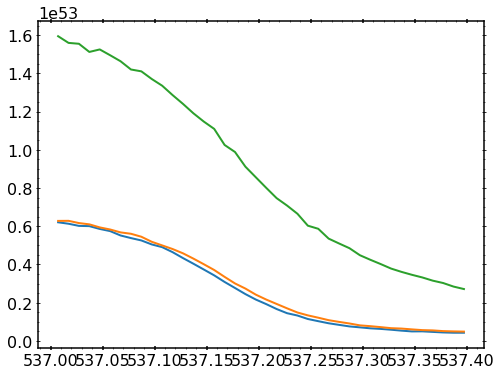

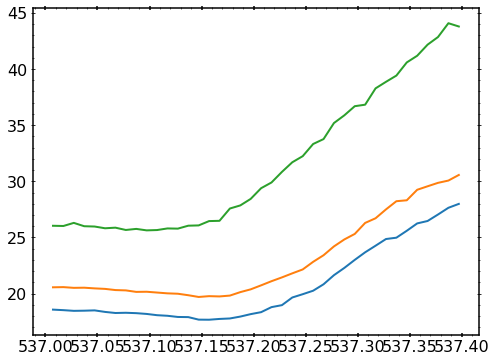

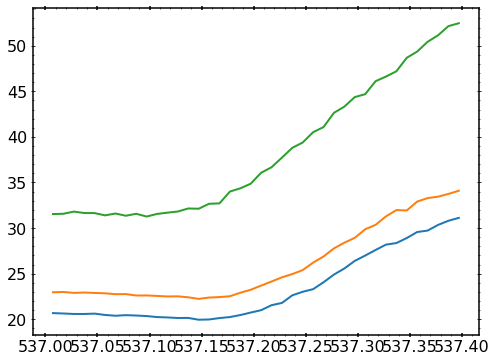

In [6]:
for i in range(3):
    plt.plot(SG_times,SG_data[0,i,:])
    plt.plot(SG_times,SG_data[1,i,:])
    plt.plot(SG_times,SG_data[2,i,:])
    plt.show()


In [7]:
outfile = open("s40_atBH_cutoff.dat",'w')
outfile.write("#tbounce=0\n")
for i in range(40):
    outfile.write(str(SG_times[i]/1000.)+" "+str(SG_data[0,0,i])+" "+str(SG_data[1,0,i])+" "+str(SG_data[2,0,i])+" "+str(SG_data[0,1,i])+" "+str(SG_data[1,1,i])+" "+str(SG_data[2,1,i])+" "+str(SG_data[0,2,i])+" "+str(SG_data[1,2,i])+" "+str(SG_data[2,2,i])+"\n")
outfile.close()
